# Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [ ]:
df.isnull().sum()

review_id    0
review       0
rating       0
dtype: int64

In [ ]:
df.shape

(146811, 3)

In [ ]:
df['rating'].value_counts()

4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64

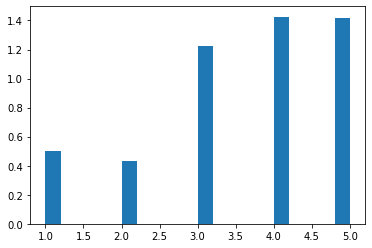

In [ ]:
plt.hist(df['rating'],density=1, bins=20)
plt.show()

# Data Cleansing & Text Preprocessing

In [ ]:
import string
import re

In [ ]:
df = df[['review', 'rating']]
df.head()

,review,rating
0,Ga disappointed neat products .. Meletot Hilsn...,1
1,"Rdtanya replace broken glass, broken chargernya",1
2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,Sent a light blue suit goods ga want a refund,1
4,Pendants came with dents and scratches on its ...,1


In [ ]:
# separate majority and minority classes
df_1 = df[df.rating == 1] 
df_3 = df[df.rating == 3] 
df_4 = df[df.rating == 4] 
df_5 = df[df.rating == 5] 
df_minority = df[df.rating == 2] 
print(df_minority['rating'].value_counts())

2    12705
Name: rating, dtype: int64


In [ ]:
# harusnya pake looping
from sklearn.utils import resample
df1 = resample(df_1, replace=False, n_samples=12705, random_state=42)
df3 = resample(df_3, replace=False, n_samples=12705, random_state=42)
df4 = resample(df_4, replace=False, n_samples=12705, random_state=42)
df5 = resample(df_5, replace=False, n_samples=12705, random_state=42)
data = pd.concat([df1, df3, df4, df5, df_minority])
data.rating.value_counts()

5    12705
4    12705
3    12705
2    12705
1    12705
Name: rating, dtype: int64

In [ ]:
len(data)

63525

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct= ''.join(no_punct)
    return words_wo_punct
data['clean_text']=data['review'].apply(lambda x: remove_punctuation(x))
data.head()

,review,rating,clean_text
10390,Item different from picture,1,Item different from picture
5549,Dapet apes who like this again,1,Dapet apes who like this again
3774,Items like antiques through it. Motor force Bl...,1,Items like antiques through it Motor force Bla...
8409,I did not receive the item.,1,I did not receive the item
6018,The product quality is not good,1,The product quality is not good


In [ ]:
#remove hyperlink
data['clean_text'] = data['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
data['clean_text'] = data['clean_text'].str.lower()
data.head()

,review,rating,clean_text
10390,Item different from picture,1,item different from picture
5549,Dapet apes who like this again,1,dapet apes who like this again
3774,Items like antiques through it. Motor force Bl...,1,items like antiques through it motor force bla...
8409,I did not receive the item.,1,i did not receive the item
6018,The product quality is not good,1,the product quality is not good


In [ ]:
# not my original code (spanyol code lol)
def recover_shortened_words(text):
  
    text = re.sub(r'\bapaa\b', 'apa', text)
    
    text = re.sub(r'\bbsk\b', 'besok', text)
    text = re.sub(r'\bbrngnya\b', 'barangnya', text)
    text = re.sub(r'\bbrp\b', 'berapa', text)
    text = re.sub(r'\bbgt\b', 'banget', text)
    text = re.sub(r'\bbngt\b', 'banget', text)
    text = re.sub(r'\bgini\b', 'begini', text)
    text = re.sub(r'\bbrg\b', 'barang', text)
    
    text = re.sub(r'\bdtg\b', 'datang', text)
    text = re.sub(r'\bd\b', 'di', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bdsni\b', 'disini', text)
    
    text = re.sub(r'\bgk\b', 'gak', text)
    
    text = re.sub(r'\bhrs\b', 'harus', text)
    
    text = re.sub(r'\bjd\b', 'jadi', text)
    text = re.sub(r'\bjg\b', 'juga', text)
    text = re.sub(r'\bjgn\b', 'jangan', text)
    
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\blgi\b', 'lagi', text)
    text = re.sub(r'\blbh\b', 'lebih', text)
    text = re.sub(r'\blbih\b', 'lebih', text)
    
    text = re.sub(r'\bmksh\b', 'makasih', text)
    text = re.sub(r'\bmna\b', 'mana', text)
    
    text = re.sub(r'\borg\b', 'orang', text)
    
    text = re.sub(r'\bpjg\b', 'panjang', text)
    
    text = re.sub(r'\bka\b', 'kakak', text)
    text = re.sub(r'\bkk\b', 'kakak', text)
    text = re.sub(r'\bklo\b', 'kalau', text)
    text = re.sub(r'\bkmrn\b', 'kemarin', text)
    text = re.sub(r'\bkmrin\b', 'kemarin', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bkcil\b', 'kecil', text)
    
    text = re.sub(r'\bgmn\b', 'gimana', text)
    text = re.sub(r'\bgmna\b', 'gimana', text)
    
    text = re.sub(r'\btp\b', 'tapi', text)
    text = re.sub(r'\btq\b', 'thanks', text)
    text = re.sub(r'\btks\b', 'thanks', text)
    text = re.sub(r'\btlg\b', 'tolong', text)
    text = re.sub(r'\bgk\b', 'tidak', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bgpp\b', 'tidak apa apa', text)
    text = re.sub(r'\bgapapa\b', 'tidak apa apa', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\btgl\b', 'tanggal', text)
    text = re.sub(r'\btggl\b', 'tanggal', text)
    text = re.sub(r'\bgamau\b', 'tidak mau', text)
    
    text = re.sub(r'\bsy\b', 'saya', text)
    text = re.sub(r'\bsis\b', 'sister', text)
    text = re.sub(r'\bsdgkan\b', 'sedangkan', text)
    text = re.sub(r'\bmdh2n\b', 'semoga', text)
    text = re.sub(r'\bsmoga\b', 'semoga', text)
    text = re.sub(r'\bsmpai\b', 'sampai', text)
    text = re.sub(r'\bnympe\b', 'sampai', text)
    text = re.sub(r'\bdah\b', 'sudah', text)
    
    text = re.sub(r'\bberkali2\b', 'repeated', text)
  
    text = re.sub(r'\byg\b', 'yang', text)
    
    return text

In [ ]:
data['clean_text'] = data['clean_text'].apply(recover_shortened_words)
data.head()

,review,rating,clean_text
10390,Item different from picture,1,item different from picture
5549,Dapet apes who like this again,1,dapet apes who like this again
3774,Items like antiques through it. Motor force Bl...,1,items like antiques through it motor force bla...
8409,I did not receive the item.,1,i did not receive the item
6018,The product quality is not good,1,the product quality is not good


In [ ]:
un_words_count = pd.Series(' '.join(data.clean_text).split()).value_counts()
len(un_words_count)

43146

In [ ]:
un_words_count.head(10)

the         38726
good        29923
is          22511
product     22055
quality     19670
very        15685
not         14241
delivery    14126
to          13508
of          11519
dtype: int64

# Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
# set hyperparameter
vocab_size = 7000 # make the top list of words (common words)
embedding_dim = 32
max_length = 354
oov_tok = '<OOV>' # OOV = Out of Vocabulary

In [ ]:
# splitting dataset
X = data['clean_text']
Y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(57172,) (57172,)
(6353,) (6353,)


In [ ]:
# set tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
 # training set
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length)

In [ ]:
# validation set
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

In [ ]:
from keras.utils import to_categorical
print(set(data['rating']))
#training_label_seq = np.asarray(train_labels).astype(np.float32)
#validation_label_seq = np.asarray(validation_labels).astype(np.float32)
training_label_seq = to_categorical(y_train)
validation_label_seq = to_categorical(y_test)

{1, 2, 3, 4, 5}


In [ ]:
# dropout to avoid overfitting
# softmax as multiclass clf
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=354))
model.add(Dropout(0.5))
model.add(Bidirectional(CuDNNLSTM(100)))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 354, 32)           224000    
_________________________________________________________________
dropout (Dropout)            (None, 354, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               107200    
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 332,406
Trainable params: 332,406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# pakai sparse_categorical_crossentropy kalau ada 1D integer hot encode
# categorical_crossentropy for 2D w/o hot encode
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

## Training process

In [ ]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
phrase_len.max()

354

In [ ]:
print(train_padded.shape)
print(training_label_seq.shape)
print(validation_padded.shape)
print(validation_label_seq.shape)

(132129, 200)
(132129, 6)
(14682, 200)
(14682, 6)


In [ ]:
training_label_seq

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, batch_size=10, validation_data=(validation_padded, validation_label_seq), verbose=1)

Epoch 1/10
5718/5718 [==============================] - 182s 26ms/step - loss: 1.2996 - accuracy: 0.4014 - val_loss: 1.0882 - val_accuracy: 0.4987
Epoch 2/10
5718/5718 [==============================] - 149s 26ms/step - loss: 1.0584 - accuracy: 0.5168 - val_loss: 1.0711 - val_accuracy: 0.5068
Epoch 3/10
5718/5718 [==============================] - 151s 26ms/step - loss: 1.0135 - accuracy: 0.5327 - val_loss: 1.0761 - val_accuracy: 0.4982
Epoch 4/10
5718/5718 [==============================] - 153s 27ms/step - loss: 0.9857 - accuracy: 0.5453 - val_loss: 1.0765 - val_accuracy: 0.5119
Epoch 5/10
5718/5718 [==============================] - 151s 26ms/step - loss: 0.9635 - accuracy: 0.5581 - val_loss: 1.0725 - val_accuracy: 0.5046
Epoch 6/10
5718/5718 [==============================] - 151s 26ms/step - loss: 0.9494 - accuracy: 0.5645 - val_loss: 1.0746 - val_accuracy: 0.5098
Epoch 7/10
5718/5718 [==============================] - 151s 26ms/step - loss: 0.9331 - accuracy: 0.5708 - val_loss: 1

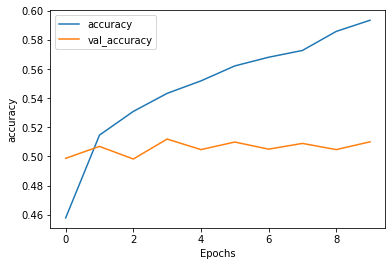

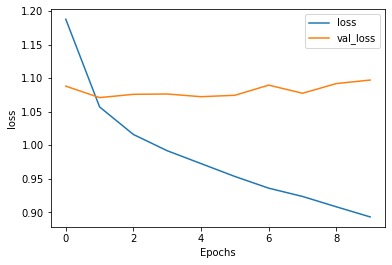

In [ ]:
# plot history accuracy
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Predict

In [ ]:
# predict 1 - fake generated review
txt = ["barangnya bagus, seller oke dan terpercaya, mantaplah pokoknya."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(np.argmax(pred))

4


In [ ]:
# predict 2 - fake generated review
txt = ["dissapointed, seller galak dan barang telat nyampe."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(np.argmax(pred))

1


In [ ]:
# predict 3 - taken from shopee real customer review with 3 stars rating
txt = ["Kl aku LBh suka yg real gini tmn tmn,kadang ad jg fg yg suka konyol kadang bajunya
 wrna merah di edit look nya ala tone kuning gt pas baju merah nya berubah jd kuning,
 lahhh percuma donk manten Ny pilih merah bajunya di edit kuning 😤😤😤"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(np.argmax(pred))

4


In [ ]:
# predict 4 - taken from shopee real customer review with 2 stars rating
txt = ["Alhamdulillah paket sudah saya terima. Tpi saya kecewa, Krn pesen warna mustard koq 
datangnya coklat? Pdhl bwt dress code acara"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(np.argmax(pred))

2


In [ ]:
# predict 5 - taken from shopee real customer review with 4 stars rating
txt = ["Harga sama kualitas sesuailah yaaaa....suka sekali sama modelnya warna navy nya juga bagus...
ga bladus....meskipun ada sobekannya dikit....tolong diperhatikan lagi yaaaa...."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(np.argmax(pred))

3


# Save Model

In [ ]:
# save model, just in case
model.save('lstm_multiclass_text_1')

INFO:tensorflow:Assets written to: lstm_multiclass_text_1/assets


INFO:tensorflow:Assets written to: lstm_multiclass_text_1/assets


In [ ]:
# to load the model
#new_model = tf.keras.models.load_model('lstm_multiclass_text_1')

Save with HDF5 format

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('lstm_final.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('lstm_final.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 177,286
Trainable params: 177,286
Non-trainable params: 0
_________________________________________________________________


# Submission file

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


In [ ]:
import time
from datetime import timedelta
start_time = time.time()

pred = []
for i in df_test['review']:
  a = tokenizer.texts_to_sequences([i])
  b = pad_sequences(a, maxlen=max_length)
  c = model.predict(b)
  result = np.argmax(c)
  pred.append(result)

submission = pd.concat([df_test['review_id'], pd.Series(pred, name='rating')], axis=1)
submission.to_csv('sample_LSTM.csv', index=False)
submission.head(11)

elapsed_time_secs = time.time() - start_time
msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print(msg) 

Execution took: 0:34:31 secs (Wall clock time)


In [ ]:
submission.head()

,review_id,rating
0,1,4
1,2,2
2,3,4
3,4,4
4,5,4


In [ ]:
submission.tail()

,review_id,rating
60422,60423,4
60423,60424,2
60424,60425,4
60425,60426,4
60426,60427,4


In [ ]:
submission['rating'].value_counts()

4    27910
5     9356
3     9286
2     7107
1     6768
Name: rating, dtype: int64

# Modeling 2 (Tryout)

In [ ]:
# model 2 test
# dropout to avoid overfitting
# softmax as multiclass clf
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=354))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 354, 32)           160000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 354, 32)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)               295936    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1542      
Total params: 523,270
Trainable params: 523,270
Non-trainable params: 0
_______________________________________________